### kNN

In [1]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
p1 = np.array([1,1])
p2 = np.array([4,4])

In [3]:
# calculate distance
def distance(p1, p2):
    """Finds the 2d euclidean distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

In [4]:
# majority vote
def majority_vote(votes):
    """
    Returns mode.
    """    
    mode, count = ss.stats.mode(votes)    
    return mode 

In [5]:
# loope over all points
    # comput dists between px and all other points
# sort dists and return nearest

In [6]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
px = np.array([2.5, 2])

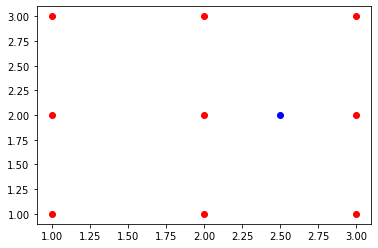

In [7]:
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(px[0], px[1], "bo")
plt.show()

In [8]:
def find_nearest_neighbors(p, points, k=5):
    """ Find k nearest neighbors of point p."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(px, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [9]:
ind = find_nearest_neighbors(px, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [10]:
def knn_predict(p, points, outcomes, k=5):
    # find k nearast neighbors
    ind = find_nearest_neighbors(px, points, k)
    # predict class of p based on majority vote
    return majority_vote(outcomes[ind])

In [11]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    
    (x_min, x_max, y_min, y_max) = limits
    
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[i,j] = knn_predict(p, predictors, outcomes, k)
            
    return (xx, yy, prediction_grid)

### Sklearn

In [21]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

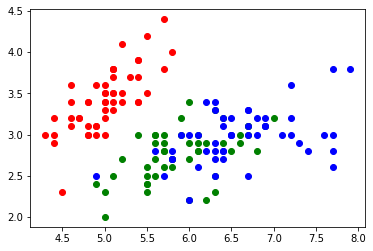

In [18]:
iris = datasets.load_iris()

predictors = iris.data[:, 0:2]
outcomes = iris.target

plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [26]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])